In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from celluloid import Camera
import time
from tqdm.notebook import tqdm

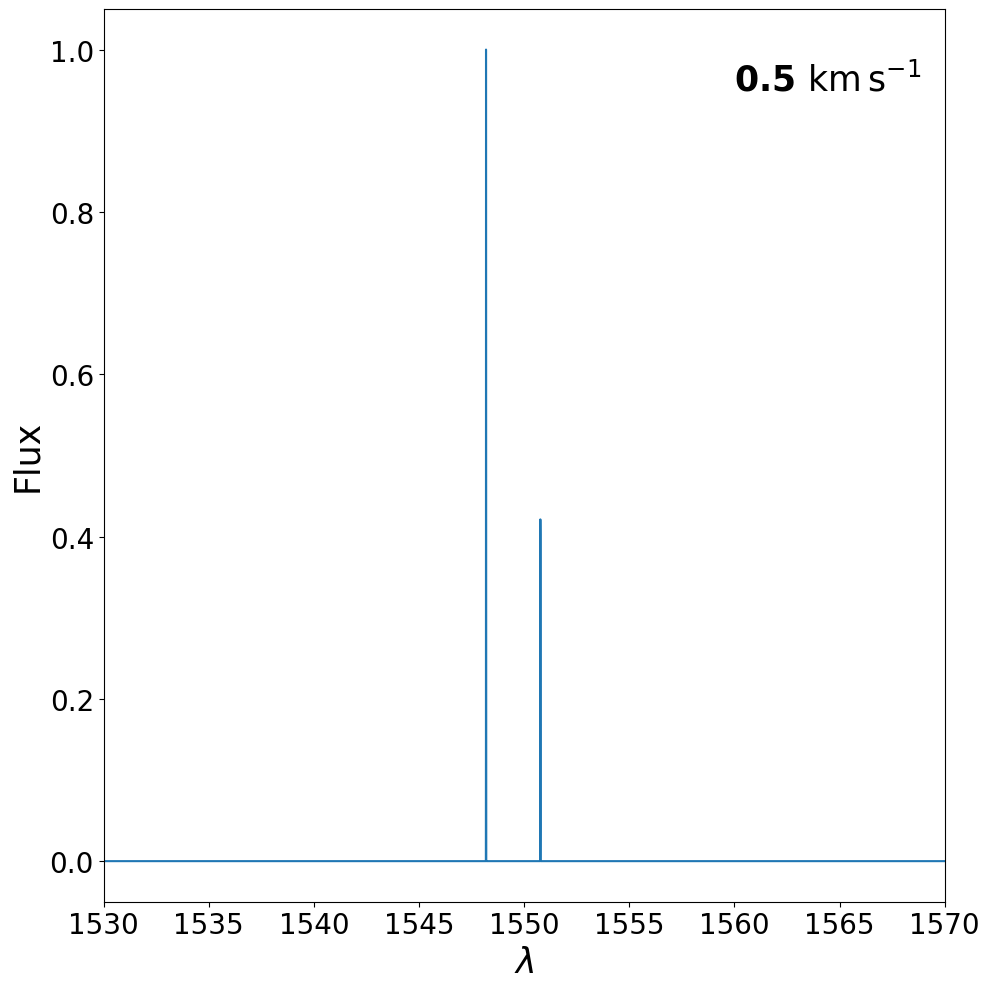

In [3]:
cc_k = c.to(u.km / u.s).value

def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

NN = 10000
x = np.linspace(1530,1570,NN)

C_IV_K = 1548.187 # cm
C_IV_H = 1550.772  # cm

fig = plt.figure(1,figsize=(10,10))
sig = 0.5
ff,f0 = function(sig,x,C_IV_K,C_IV_H)
plt.plot(x,ff/f0)
plt.xlim(x.min(),x.max())
plt.ylabel('Flux',fontsize=25)
plt.xlabel(r'$\lambda$',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)    
plt.text(1560,0.95,f'{sig} $\\rm km \\, s^{{-1}}$',size=25,fontweight='bold')
plt.tight_layout()

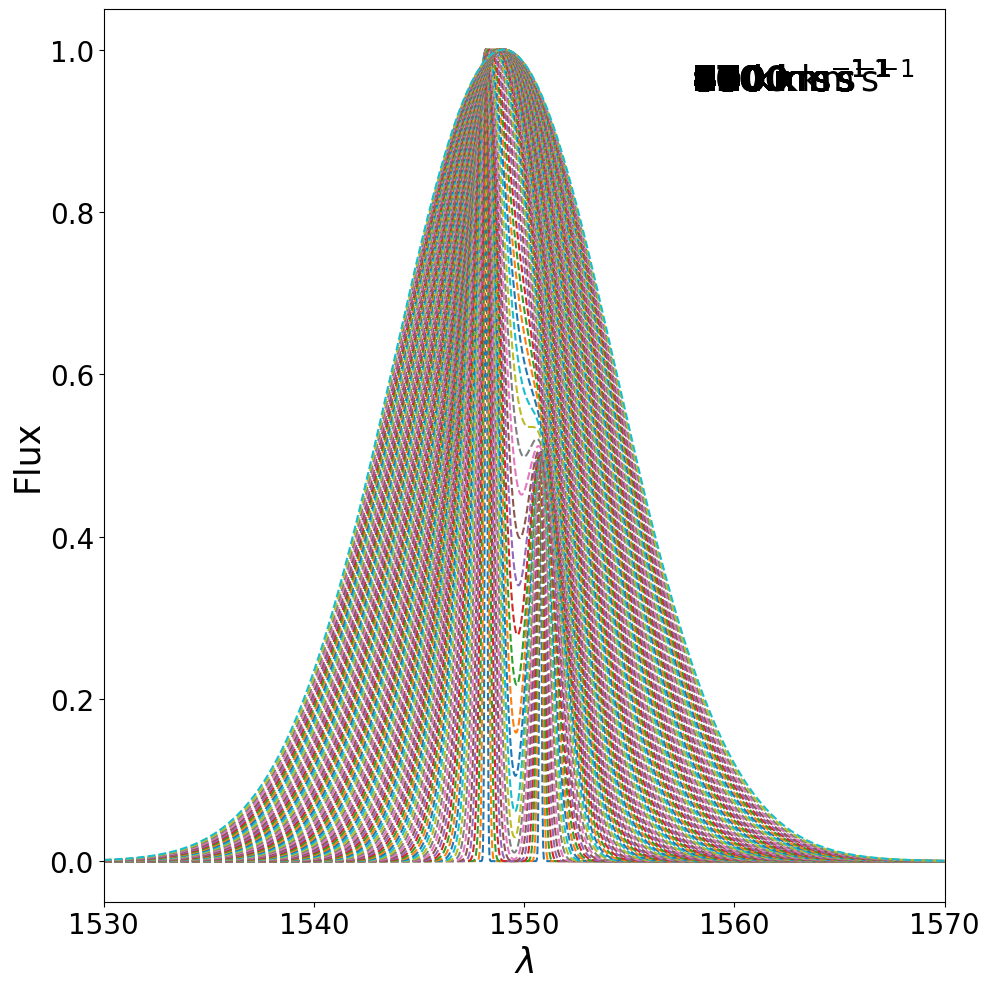

In [16]:
fig = plt.figure(1,figsize=(10,10))
camera = Camera(fig)
NN = 10000
x = np.linspace(1530,1570,NN)
sigma_tt = np.arange(10,1010,10)
C_IV_K = 1548.187 # cm
C_IV_H = 1550.772  # cm
R_c_tt = np.zeros(len(sigma_tt)) 
lam_c = (C_IV_H +C_IV_K) / 2
for ii, sig in (enumerate(sigma_tt)):
    ff,f0 = function(sig,x,C_IV_K,C_IV_H)
    xx_k = x[x<=lam_c]
    xx_h = x[x>lam_c]   
    ff_k = ff[x<=lam_c]
    ff_h = ff[x>lam_c] 
    dlam = x[1]-x[0]
    flux_k = np.sum(ff_k*dlam,axis=0)
    flux_h = np.sum(ff_h*dlam,axis=0)
    R_c_tt[ii] = flux_k/ flux_h


    plt.plot(x,ff/f0,'--')
    plt.xlim(x.min(),x.max())
    plt.ylabel('Flux',fontsize=25)
    plt.xlabel(r'$\lambda$',fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(np.arange(1530,1580,10),fontsize=20)    
    plt.text(1558,0.95,f'{sig} $\\rm km \\, s^{{-1}}$',size=25,fontweight='bold')
    plt.tight_layout()
    camera.snap()  # 애니메이션에 추가
    fig

1.1408843429403284


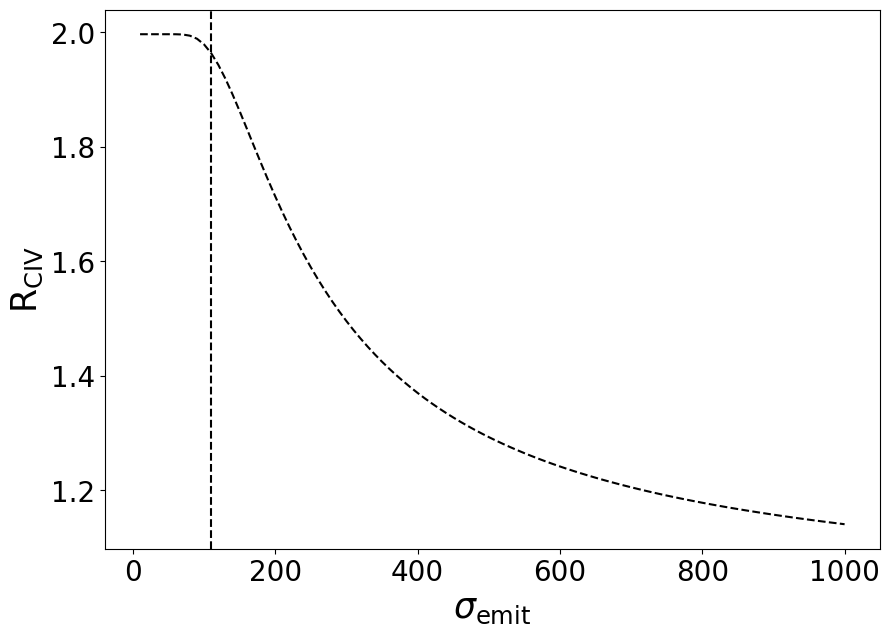

In [5]:
fig = plt.figure(1,figsize=(10,7))
plt.plot(sigma_tt,R_c_tt,'k--')
plt.xlabel(r'$\sigma_{\rm emit}$',fontsize= 25)
plt.ylabel(r'$\rm R_{\rm C IV}$',fontsize=25)
plt.axvline(x=110,ymin=0,ymax=3,color='k',linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print(R_c_tt[-1])
# plt.savefig(r'/home/jin/바탕화면/Aanlytic_solution_ratio.pdf',bbox_inches='tight')

In [20]:
lam_c = (C_IV_H +C_IV_K) / 2
x = np.linspace(1525,1575,NN)

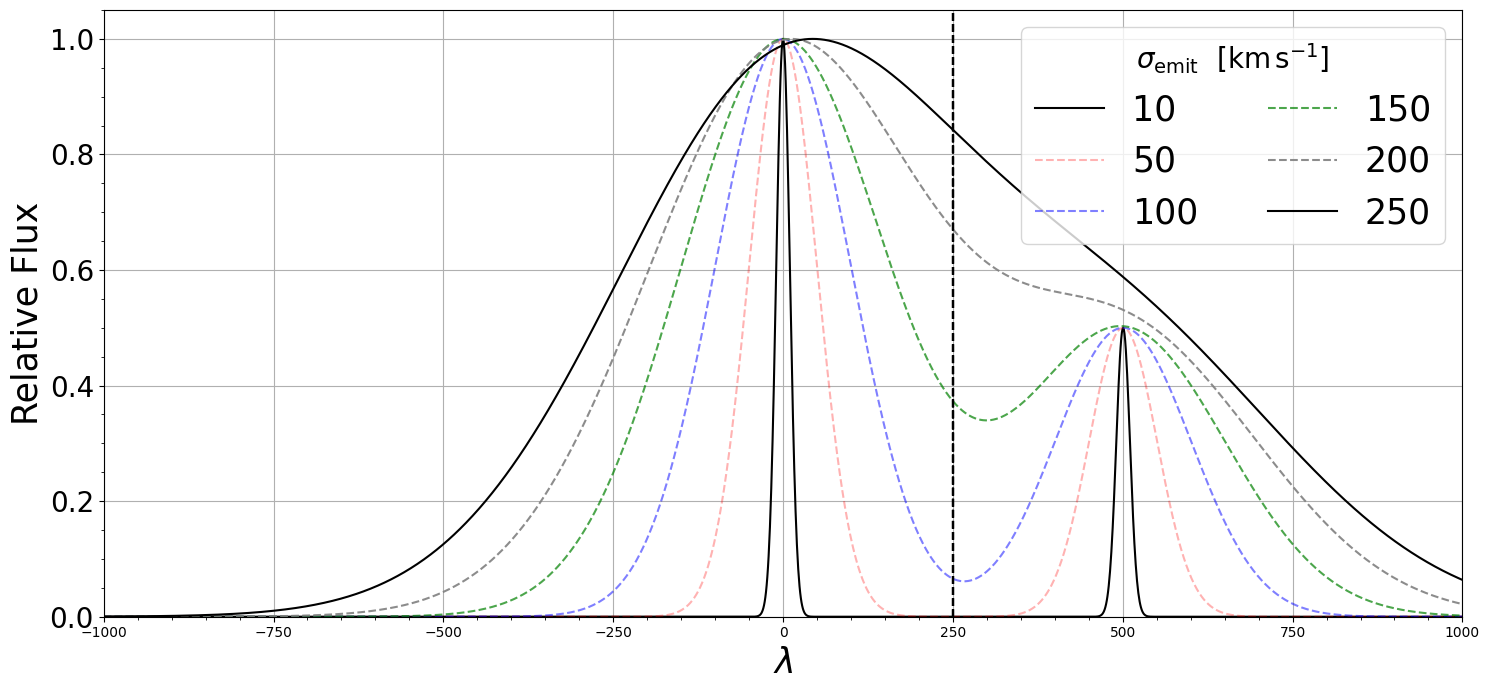

In [26]:
fig = plt.figure(1,figsize=(15,7))
sigma = [10,50,100,150,200,250]
alpha = [0.1,0.3,0.5,0.7,0.9,1]
color = ['y','r','b','g','grey']

x_v = (x/C_IV_K - 1) * cc_k
R_c = np.zeros(len(sigma))
lam_c_v = (lam_c/C_IV_K -1)*cc_k
# ff,f0 = function(10,x,C_IV_K,C_IV_H)

for ii , sig in enumerate(sigma):
    ff,f0 = function(sig,x,C_IV_K,C_IV_H)
    if sig == sigma[-1]:
        plt.plot(x_v,ff/f0,'k-',alpha=1,label=f'{sig}')
    elif sig == sigma[0]:
        plt.plot(x_v,ff/f0,'-',color='k',alpha=1,label=f'{sig} ')
    else:
        plt.plot(x_v,ff/f0,'--',color=color[ii],alpha=alpha[ii],label=f'{sig}')


    xx_k = x[x<=lam_c_v]
    xx_h = x[x>lam_c_v]   
    ff_k = ff[x<=lam_c_v]
    ff_h = ff[x>lam_c_v] 

    dlam = x[1]-x[0]
    flux_k = np.sum(xx_k*ff_k*dlam,axis=0)
    flux_h = np.sum(xx_h*ff_h*dlam,axis=0)
    plt.axvline(lam_c_v,ymin=0,ymax=3,color='k',linestyle='--')
    plt.ylim(0,1+0.05)
    R_c[ii] = flux_k/ flux_h
    plt.xlim(-1000,1000)
    plt.ylabel('Relative Flux',fontsize=25)
    plt.xlabel(r'$\lambda$',fontsize=25)
    plt.yticks(fontsize=20)
    # plt.xticks(np.arange(1540,1565,5),fontsize=20)    
    plt.tight_layout()
    plt.minorticks_on()
    plt.grid(True)
    plt.legend(loc='upper right',ncol=2,fontsize= 25,title=r'$\sigma_{\rm emit} ~~ [\rm km \, s^{-1}]$',title_fontsize='20')

    # plt.savefig(r'/home/jin/바탕화면/Aanlytic_solution_gauss.pdf',bbox_inches='tight')

In [7]:
# from IPython.display import HTML
# animation = camera.animate(interval=100)
# animation.save('peak_move.mp4', writer='ffmpeg')
# HTML(animation.to_html5_video())
